PART A: MANUAL CALCULATIONS

Sample Dataset:
   Age  Income  Buy
0    0       0    0
1    0       0    0
2    1       0    0
3    2       0    0
4    2       1    1
5    2       1    1
6    1       1    1
7    0       1    0
8    2       0    1
9    0       1    1

Gini Impurity Calculation:
Total=10, Yes=5, No=5
Gini = 0.5000

Entropy Calculation:
Entropy = 1.0000

Example Split: Age <= 1
Gini Left = 0.4444
Gini Right = 0.3750
Information Gain = 0.0833

PART B: IRIS DATASET

Accuracy:
Gini Accuracy: 0.756
Entropy Accuracy: 0.667


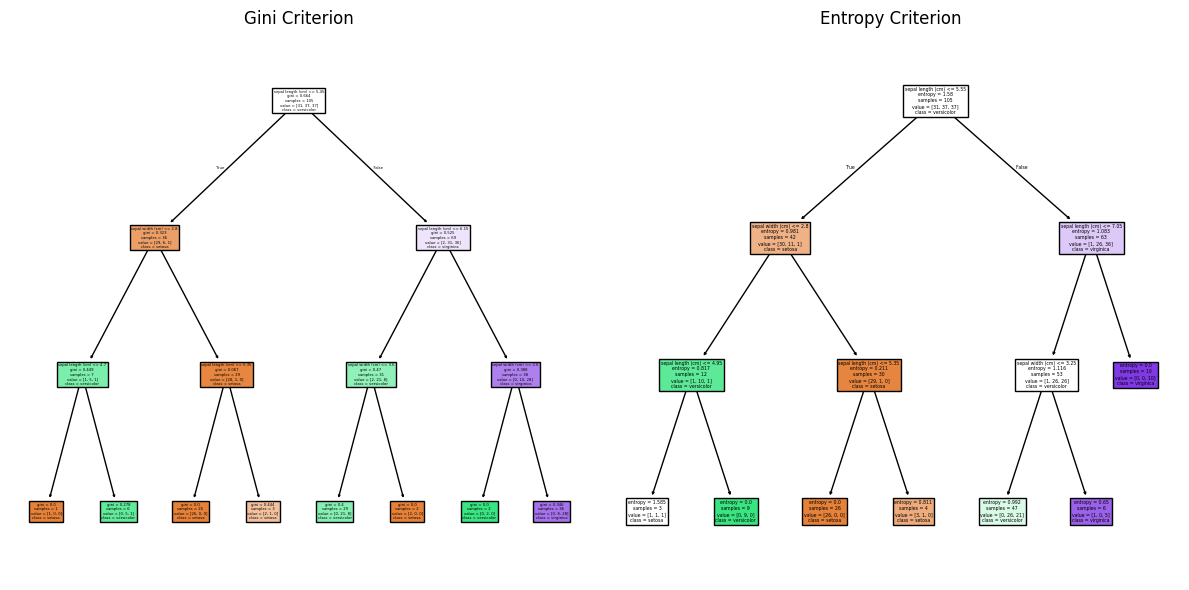


Feature Importance (Gini):
sepal length (cm): 0.723
sepal width (cm): 0.277

Feature Importance (Entropy):
sepal length (cm): 0.686
sepal width (cm): 0.314

Depth | Gini Acc | Entropy Acc
-----------------------------------
  1   |   0.644   |    0.667    
  2   |   0.756   |    0.711    
  3   |   0.756   |    0.667    
  4   |   0.756   |    0.800    
  5   |   0.756   |    0.756    


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# PART A: MANUAL CALCULATIONS

print("=" * 60)
print("PART A: MANUAL CALCULATIONS")
print("=" * 60)

# 1. Create simple dataset
data = [
    [0, 0, 0],
    [0, 0, 0],
    [1, 0, 0],
    [2, 0, 0],
    [2, 1, 1],
    [2, 1, 1],
    [1, 1, 1],
    [0, 1, 0],
    [2, 0, 1],
    [0, 1, 1]
]

df = pd.DataFrame(data, columns=['Age', 'Income', 'Buy'])
print("\nSample Dataset:")
print(df)

# 2. Gini Impurity
labels = df['Buy'].values
n_total = len(labels)
n_yes = sum(labels)
n_no = n_total - n_yes

p_yes = n_yes / n_total
p_no = n_no / n_total

gini = 1 - (p_yes**2 + p_no**2)

print("\nGini Impurity Calculation:")
print(f"Total={n_total}, Yes={n_yes}, No={n_no}")
print(f"Gini = {gini:.4f}")

# 3. Entropy
entropy = 0
if p_yes > 0:
    entropy -= p_yes * np.log2(p_yes)
if p_no > 0:
    entropy -= p_no * np.log2(p_no)

print("\nEntropy Calculation:")
print(f"Entropy = {entropy:.4f}")

# 4. Example Split: Age <= 1
left = df[df['Age'] <= 1]['Buy'].values
right = df[df['Age'] > 1]['Buy'].values

def simple_gini(y):
    if len(y) == 0:
        return 0
    p1 = sum(y) / len(y)
    p0 = 1 - p1
    return 1 - (p1**2 + p0**2)

gini_left = simple_gini(left)
gini_right = simple_gini(right)

weighted_gini = (len(left)/n_total)*gini_left + (len(right)/n_total)*gini_right
gain = gini - weighted_gini

print("\nExample Split: Age <= 1")
print(f"Gini Left = {gini_left:.4f}")
print(f"Gini Right = {gini_right:.4f}")
print(f"Information Gain = {gain:.4f}")

# PART B: IRIS DATASET IMPLEMENTATION


print("\n" + "=" * 60)
print("PART B: IRIS DATASET")
print("=" * 60)

# 1. Load Dataset
iris = load_iris()
X = iris.data[:, :2]   # Use only 2 features
y = iris.target

feature_names = iris.feature_names[:2]
target_names = iris.target_names

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Train Models
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

dt_gini.fit(X_train, y_train)
dt_entropy.fit(X_train, y_train)

# 4. Evaluate
acc_gini = accuracy_score(y_test, dt_gini.predict(X_test))
acc_entropy = accuracy_score(y_test, dt_entropy.predict(X_test))

print("\nAccuracy:")
print(f"Gini Accuracy: {acc_gini:.3f}")
print(f"Entropy Accuracy: {acc_entropy:.3f}")

# 5. Visualize Trees
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_tree(dt_gini, feature_names=feature_names,
          class_names=target_names, filled=True, ax=axes[0])
axes[0].set_title("Gini Criterion")

plot_tree(dt_entropy, feature_names=feature_names,
          class_names=target_names, filled=True, ax=axes[1])
axes[1].set_title("Entropy Criterion")

plt.tight_layout()
plt.show()

# 6. Feature Importance
print("\nFeature Importance (Gini):")
for name, imp in zip(feature_names, dt_gini.feature_importances_):
    print(f"{name}: {imp:.3f}")

print("\nFeature Importance (Entropy):")
for name, imp in zip(feature_names, dt_entropy.feature_importances_):
    print(f"{name}: {imp:.3f}")

# 7. Pruning using max_depth
print("\nDepth | Gini Acc | Entropy Acc")
print("-" * 35)

for depth in [1, 2, 3, 4, 5]:
    dt_g = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt_e = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)

    dt_g.fit(X_train, y_train)
    dt_e.fit(X_train, y_train)

    acc_g = accuracy_score(y_test, dt_g.predict(X_test))
    acc_e = accuracy_score(y_test, dt_e.predict(X_test))

    print(f"{depth:^5} | {acc_g:^9.3f} | {acc_e:^12.3f}")